# Práctica 2: Aprendizaje automático no supervisado

El objetivo de esta práctica es aplicar algunos algoritmos de aprendizaje automático no supervisado disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre un conjunto de datos e interpretar los resultados obtenidos.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

__Número de grupo: 11__

__Nombres de los estudiantes: Alejandro Barrachina Argudo y Jaime Benedí Galdeano__

In [1]:
# acceso a google drive

# from google.colab import drive
# drive.mount('/content/drive')

## 1) Carga del conjunto de datos

Crea un dataframe a partir del fichero `housing.csv` que se proporciona junto con la práctica.
Antes de nada, elimina las filas con valores nulos.



In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./housing.csv')
df = df.dropna()
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20433 rows x 10 columns]

## 2) Análisis de los datos

### 2.1) Numéricos

Analiza razonadamente las distribuciones de cada una de las variables numéricas (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

In [3]:
desc= df.describe()
desc

longitude      latitude  housing_median_age   total_rooms  \
count  20433.000000  20433.000000        20433.000000  20433.000000   
mean    -119.570689     35.633221           28.633094   2636.504233   
std        2.003578      2.136348           12.591805   2185.269567   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1450.000000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.720000           37.000000   3143.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20433.000000  20433.000000   20433.000000   
mean       537.870553   1424.946949    499.433465       3.871162   
std        421.385070   1133.208490    382.299226       1.899291   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563700   
50%        435.000000   1166.000000    409.000000       3.536500   
75%        647.000000   1722.000000    604.000000       4.744000   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20433.000000  
mean        206864.413155  
std         115435.667099  
min          14999.000000  
25%         119500.000000  
50%         179700.000000  
75%         264700.000000  
max         500001.000000

De los datos, realizamos las siguientes observaciones:

- Asumimos los datos de longitud y latitud medidos en grados decimales.
- Asumimos la edad media de la casa en un bloque medida en años.
- Asumimos el sueldo medio por unidad familiar en dólares estadounidenses($)
- Asumimos el valor de las casas medio en dólares estadounidenses($)

#### Longitudes y latitudes

Respecto a las longitudes y latitudes, tienen desviaciones estándar numéricamente pequeñas. Sin embargo, dado que hablamos de coordenadas geográficas, espacialmente da a enterder que son datos relativamente cercanos pertenecientes a una región extensa.

De hecho, si disponemos en un gráfico las latitudes y longitudes, y gracias que sabemos que los precios están medidos en dólares estadounidenses, veremos que resulta muy probable que estemos trabajando con inmuebles procedientes del estado de California.

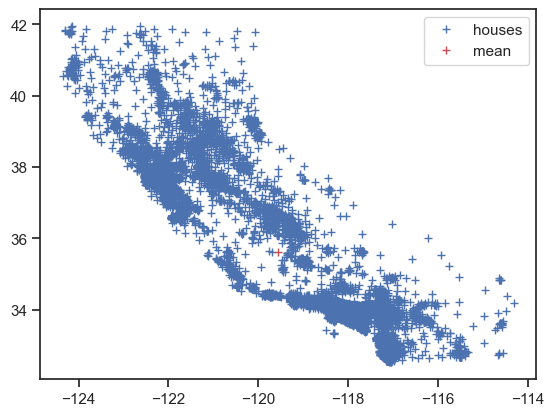

In [33]:
# Montamos las coordenadas de las casas
plt.plot(df.values[:,0], df.values[:,1], "b+")
# Mostramos la posición geográfica media
plt.plot(desc.values[1][0], desc.values[1][1], "r+")
plt.legend(labels=['houses', 'mean'])

Esta teoría explicaría la distribución de los cuartiles de las coordenadas respecto al número total de casas. En las longitudes, las fronteras entre el segundo y tercer cuartil están muy muy cercanas, dando a entender que entorno a la longitud -118 hay una gran concetración de datos. Geográficamente esto coincidiría con la ciudad más pobladad del estado: Los Ángeles. Este razonamiento es equivalente con el primer y segundo cuartil de las latitudes, coincidente con las coordenadas supuestas para la ciudad de los Ángeles.

<Axes: >

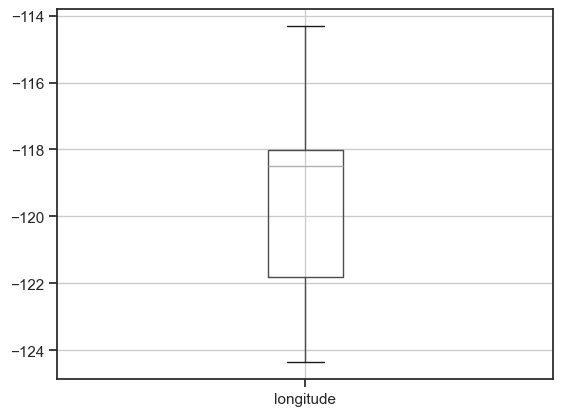

In [34]:
df.boxplot(column=['longitude'])

<Axes: >

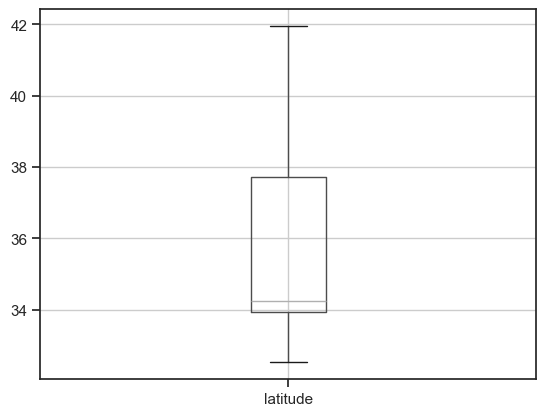

In [35]:
df.boxplot(column=['latitude'])

La media correspondería aproximadamente con las coordenadas de la ciudad de Bakersfield, dato no relevante más allá de estar lejos de ocupar el centro geográfico del estado debido a la cuantía de datos en la ciudad de los Ángeles.

El hecho de que ambas variables de longitud y latitud estén centradas en una zona relativamente concreta a la frontera política de California, explica como ni los datos mínimos ni máximos son considerables outliers, puesto que espacialmente no tendría sentido añadir inmuebles de fuera de la zona de análisis.

#### Edad media del inmueble

Respecto a la edad, tendría sentido hacer un análisis aislado de la variable, dado lo diferente que es su unidad de medida respecto al resto.

Dado que dos casas pueden tener la misma edad, nos interesaría saber la distribución de edades entre toda la muestra de las casas. Para eso, creamos un histograma que nos enseñe las distribuciones absolutas de los valores.

(array([ 713., 1095., 2213., 2659., 2486., 2322., 3525., 1873., 1598.,
        1949.]),
 array([ 1. ,  6.1, 11.2, 16.3, 21.4, 26.5, 31.6, 36.7, 41.8, 46.9, 52. ]),
 <BarContainer object of 10 artists>)

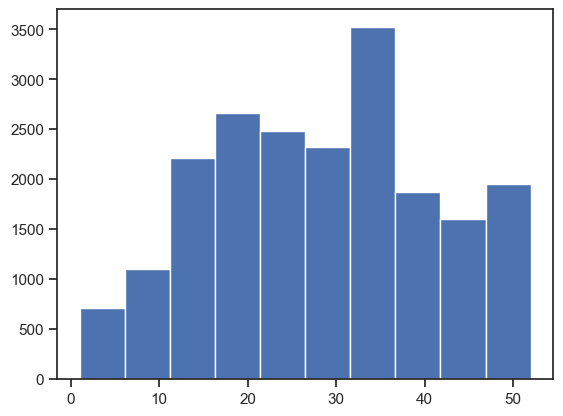

In [36]:
plt.clf()
plt.hist(df.values[:,2])

#### Numero de salas y habitaciones

Text(0.5, 0, 'total_rooms')

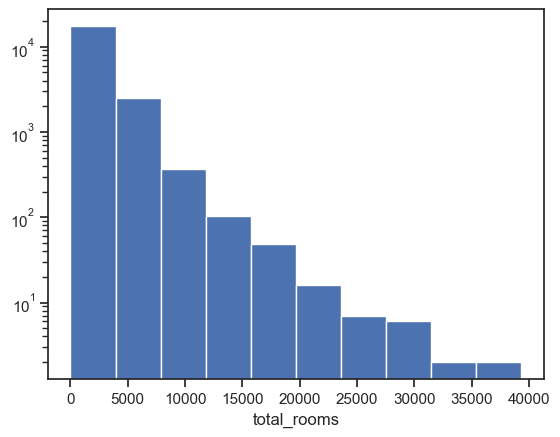

In [37]:
plt.clf()
analisis_valores = df.values
plt.hist(analisis_valores[:,3], log=True)
plt.xlabel(df.columns[3])

Text(0.5, 0, 'total_bedrooms')

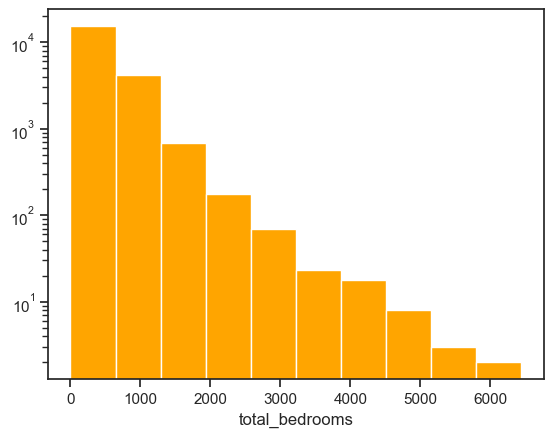

In [40]:
plt.clf()
plt.hist(analisis_valores[:, 4], log=True, color="orange")
plt.xlabel(df.columns[4])

In [4]:
df_num = df.loc[:, df.dtypes != object] # dejamos solo los valores numéricos
df_num

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  
0           322.0       126.0         8.3252            452600.0  
1          2401.0      1138.0         8.3014            358500.0  
2           496.0       177.0         7.2574            352100.0  
3           558.0       219.0         5.6431            341300.0  
4           565.0       259.0         3.8462            342200.0  
...           ...         ...            ...                 ...  
20635       845.0       330.0         1.5603             78100.0  
20636       356.0       114.0         2.5568             77100.0  
20637      1007.0       433.0         1.7000             92300.0  
20638       741.0       349.0         1.8672             84700.0  
20639      1387.0       530.0         2.3886             89400.0  

[20433 rows x 9 columns]

In [5]:
corr = df_num.corr()
corr

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924616           -0.109357     0.045480   
latitude            -0.924616  1.000000            0.011899    -0.036667   
housing_median_age  -0.109357  0.011899            1.000000    -0.360628   
total_rooms          0.045480 -0.036667           -0.360628     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.100270 -0.108997           -0.295787     0.857281   
households           0.056513 -0.071774           -0.302768     0.918992   
median_income       -0.015550 -0.079626           -0.118278     0.197882   
median_house_value  -0.045398 -0.144638            0.106432     0.133294   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.100270    0.056513      -0.015550   
latitude                 -0.066983   -0.108997   -0.071774      -0.079626   
housing_median_age       -0.320451   -0.295787   -0.302768      -0.118278   
total_rooms               0.930380    0.857281    0.918992       0.197882   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907186       0.005087   
households                0.979728    0.907186    1.000000       0.013434   
median_income            -0.007723    0.005087    0.013434       1.000000   
median_house_value        0.049686   -0.025300    0.064894       0.688355   

                    median_house_value  
longitude                    -0.045398  
latitude                     -0.144638  
housing_median_age            0.106432  
total_rooms                   0.133294  
total_bedrooms                0.049686  
population                   -0.025300  
households                    0.064894  
median_income                 0.688355  
median_house_value            1.000000

In [6]:
aux = []
for i in corr.index:
    for j in corr.columns:
        if i != j and (corr[i][j] < -0.6 or corr[i][j] > 0.6):
                if((i,j,corr[i][j]) not in aux and (j,i,corr[i][j]) not in aux): # eliminamos duplicados
                    aux.append((i, j, corr[i][j]))

print("Variables con fuerte ( > 0.6 o < -0.6 ) relación:")

aux


Variables con fuerte ( > 0.6 o < -0.6 ) relación:


[('longitude', 'latitude', -0.9246161131160101),
 ('total_rooms', 'total_bedrooms', 0.9303795046865031),
 ('total_rooms', 'population', 0.8572812510982867),
 ('total_rooms', 'households', 0.9189915343453182),
 ('total_bedrooms', 'population', 0.8777467431529311),
 ('total_bedrooms', 'households', 0.9797282708045709),
 ('population', 'households', 0.9071859001744995),
 ('median_income', 'median_house_value', 0.6883554753161126)]

In [7]:
aux_inv = []
for i in corr.index:
    for j in corr.columns:
        if i != j and (corr[i][j] < 0.6 or corr[i][j] > -0.6):
                if((i,j,corr[i][j]) not in aux_inv and (j,i,corr[i][j]) not in aux_inv): # eliminamos duplicados
                    aux_inv.append((i, j, corr[i][j]))

print("Variables con baja ( < 0.6 o > -0.6 ) relación:")

aux_inv

Variables con baja ( < 0.6 o > -0.6 ) relación:


[('longitude', 'latitude', -0.9246161131160101),
 ('longitude', 'housing_median_age', -0.10935654863027307),
 ('longitude', 'total_rooms', 0.0454801674218395),
 ('longitude', 'total_bedrooms', 0.06960802175408133),
 ('longitude', 'population', 0.10027030094083503),
 ('longitude', 'households', 0.056512772430637834),
 ('longitude', 'median_income', -0.015550150379729375),
 ('longitude', 'median_house_value', -0.04539821933443104),
 ('latitude', 'housing_median_age', 0.011899066824480742),
 ('latitude', 'total_rooms', -0.036666805610771125),
 ('latitude', 'total_bedrooms', -0.06698283471949555),
 ('latitude', 'population', -0.10899734357206249),
 ('latitude', 'households', -0.07177418526952299),
 ('latitude', 'median_income', -0.07962631913885085),
 ('latitude', 'median_house_value', -0.1446382115762039),
 ('housing_median_age', 'total_rooms', -0.36062829984244227),
 ('housing_median_age', 'total_bedrooms', -0.32045104175060396),
 ('housing_median_age', 'population', -0.2957872971044803)

In [8]:
important_columns= []
for (i,j,corr) in aux:
    important_columns.append(i) if i not in important_columns else None
    important_columns.append(j) if j not in important_columns else None

important_columns

['longitude',
 'latitude',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

array([[<Axes: xlabel='longitude', ylabel='longitude'>,
        <Axes: xlabel='latitude', ylabel='longitude'>,
        <Axes: xlabel='housing_median_age', ylabel='longitude'>,
        <Axes: xlabel='total_rooms', ylabel='longitude'>,
        <Axes: xlabel='total_bedrooms', ylabel='longitude'>,
        <Axes: xlabel='population', ylabel='longitude'>,
        <Axes: xlabel='households', ylabel='longitude'>,
        <Axes: xlabel='median_income', ylabel='longitude'>,
        <Axes: xlabel='median_house_value', ylabel='longitude'>],
       [<Axes: xlabel='longitude', ylabel='latitude'>,
        <Axes: xlabel='latitude', ylabel='latitude'>,
        <Axes: xlabel='housing_median_age', ylabel='latitude'>,
        <Axes: xlabel='total_rooms', ylabel='latitude'>,
        <Axes: xlabel='total_bedrooms', ylabel='latitude'>,
        <Axes: xlabel='population', ylabel='latitude'>,
        <Axes: xlabel='households', ylabel='latitude'>,
        <Axes: xlabel='median_income', ylabel='latitude'>,
    

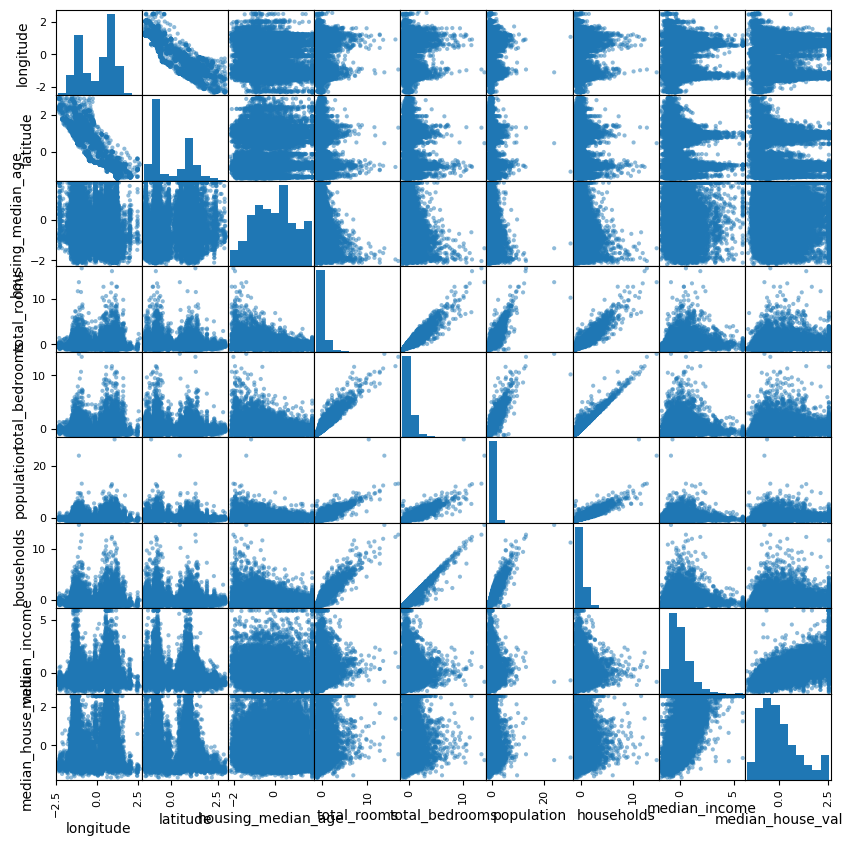

In [9]:
import pandas.plotting as pd_plot
import matplotlib
%matplotlib inline

# version casera del pairplot
normalized_df=(df_num-df_num.mean())/df_num.std()
# usamos la normalizada porque nos interesa la distribución de los datos pero los números grandes hacen que las tags sean poco legibles
pd_plot.scatter_matrix(normalized_df, figsize=(10,10))


### 2.2) Categóricos

Analiza razonadamente las distribuciones de los valores de las variables categóricas incluyendo un diagrama de frecuencias y comentando lo más destacable.

In [10]:
df_cat = df.loc[:, df.dtypes == object] # dejamos solo los valores categóricos
df_cat

ocean_proximity
0            NEAR BAY
1            NEAR BAY
2            NEAR BAY
3            NEAR BAY
4            NEAR BAY
...               ...
20635          INLAND
20636          INLAND
20637          INLAND
20638          INLAND
20639          INLAND

[20433 rows x 1 columns]

<Axes: >

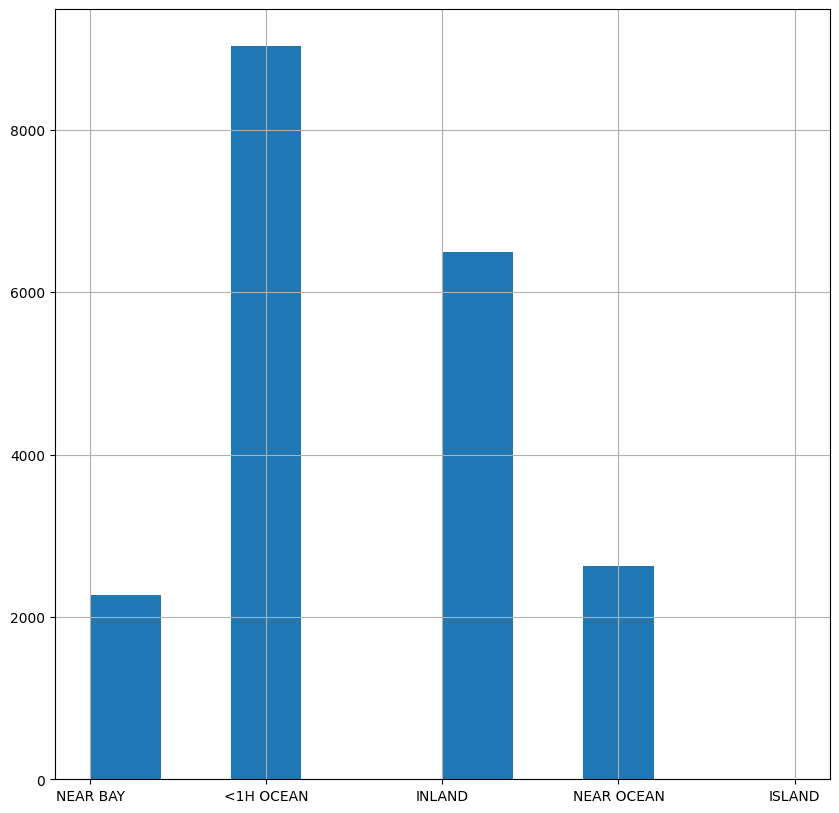

In [11]:
df_cat['ocean_proximity'].hist(figsize=(10,10))

In [12]:
island_count = df_cat['ocean_proximity'].value_counts()
island_count

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [13]:
df_simplificado = df.drop(['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'], axis=1)
df_simplificado

median_house_value ocean_proximity
0                452600.0        NEAR BAY
1                358500.0        NEAR BAY
2                352100.0        NEAR BAY
3                341300.0        NEAR BAY
4                342200.0        NEAR BAY
...                   ...             ...
20635             78100.0          INLAND
20636             77100.0          INLAND
20637             92300.0          INLAND
20638             84700.0          INLAND
20639             89400.0          INLAND

[20433 rows x 2 columns]

In [14]:
dict_transform = {'NEAR BAY': 0, '<1H OCEAN': 1, 'INLAND': 2, 'NEAR OCEAN': 3, 'ISLAND': 4}
df_simplificado['ocean_proximity'] = df_simplificado['ocean_proximity'].transform(lambda x: dict_transform[x])
df_simplificado

median_house_value  ocean_proximity
0                452600.0                0
1                358500.0                0
2                352100.0                0
3                341300.0                0
4                342200.0                0
...                   ...              ...
20635             78100.0                2
20636             77100.0                2
20637             92300.0                2
20638             84700.0                2
20639             89400.0                2

[20433 rows x 2 columns]

In [15]:
corr_simp = df_simplificado.corr()
corr_simp

median_house_value  ocean_proximity
median_house_value            1.000000        -0.212014
ocean_proximity              -0.212014         1.000000

## 3) Preprocesar los datos

Para realizar el clustering puedes decidir quedarte con un subconjunto de las variables. Justifica la respuesta de tu decisión.

Teniendo en cuenta que vamos a utilizar el algoritmo k-Means, explica razonadamente si es necesario o no cambiar la escalas de los datos y si a priori es mejor reescalarlos (MinMaxScaler) o estandarizarlos (StandarScaler).

Si decides preprocesarlos, accede al array interno del dataframe y crea un nuevo array con los datos escalados.

In [16]:
columnas_no_importantes = list(set(df_num.columns) - set(important_columns))


columnas_no_importantes

['housing_median_age']

In [17]:
df_procesado = df.drop(columnas_no_importantes + ['ocean_proximity'], axis=1)
df_procesado

longitude  latitude  total_rooms  total_bedrooms  population  \
0        -122.23     37.88        880.0           129.0       322.0   
1        -122.22     37.86       7099.0          1106.0      2401.0   
2        -122.24     37.85       1467.0           190.0       496.0   
3        -122.25     37.85       1274.0           235.0       558.0   
4        -122.25     37.85       1627.0           280.0       565.0   
...          ...       ...          ...             ...         ...   
20635    -121.09     39.48       1665.0           374.0       845.0   
20636    -121.21     39.49        697.0           150.0       356.0   
20637    -121.22     39.43       2254.0           485.0      1007.0   
20638    -121.32     39.43       1860.0           409.0       741.0   
20639    -121.24     39.37       2785.0           616.0      1387.0   

       households  median_income  median_house_value  
0           126.0         8.3252            452600.0  
1          1138.0         8.3014            358500.0  
2           177.0         7.2574            352100.0  
3           219.0         5.6431            341300.0  
4           259.0         3.8462            342200.0  
...           ...            ...                 ...  
20635       330.0         1.5603             78100.0  
20636       114.0         2.5568             77100.0  
20637       433.0         1.7000             92300.0  
20638       349.0         1.8672             84700.0  
20639       530.0         2.3886             89400.0  

[20433 rows x 8 columns]

In [18]:
from sklearn.preprocessing import MinMaxScaler
#escalamos los datos
data_scaled = MinMaxScaler().fit_transform(df_procesado)

df_scaled = pd.DataFrame(data=data_scaled, index=df_procesado.index, columns=df_procesado.columns)

df_scaled.head()

longitude  latitude  total_rooms  total_bedrooms  population  households  \
0   0.211155  0.567481     0.022331        0.019863    0.008941    0.020556   
1   0.212151  0.565356     0.180503        0.171477    0.067210    0.186976   
2   0.210159  0.564293     0.037260        0.029330    0.013818    0.028943   
3   0.209163  0.564293     0.032352        0.036313    0.015555    0.035849   
4   0.209163  0.564293     0.041330        0.043296    0.015752    0.042427   

   median_income  median_house_value  
0       0.539668            0.902266  
1       0.538027            0.708247  
2       0.466028            0.695051  
3       0.354699            0.672783  
4       0.230776            0.674638

In [19]:
from sklearn.preprocessing import StandardScaler
#estandarizamos los datos
data_standard = StandardScaler().fit_transform(df_procesado)

# Fase de transformación
df_standard = pd.DataFrame(
    data=data_standard, index=df_procesado.index, columns=df_procesado.columns)

df_standard.head()

longitude  latitude  total_rooms  total_bedrooms  population  households  \
0  -1.327314  1.051717    -0.803813       -0.970325   -0.973320   -0.976833   
1  -1.322323  1.042355     2.042130        1.348276    0.861339    1.670373   
2  -1.332305  1.037674    -0.535189       -0.825561   -0.819769   -0.843427   
3  -1.337296  1.037674    -0.623510       -0.718768   -0.765056   -0.733562   
4  -1.337296  1.037674    -0.461970       -0.611974   -0.758879   -0.628930   

   median_income  median_house_value  
0       2.345163            2.128819  
1       2.332632            1.313626  
2       1.782939            1.258183  
3       0.932970            1.164622  
4      -0.013143            1.172418

## 4) Encontrar el número óptimo de clusters

Decide razonadamente el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters. Para hacerlo calcula el índice davies_boulding en función del número de clusters.

In [20]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [21]:
RANDOM_STATE = 333

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score

K_MAX = 11
score = np.zeros(K_MAX - 2)
davies_boulding = np.zeros(K_MAX -2)
silhouette = np.zeros(K_MAX - 2)

for k in range(2, K_MAX):
    km = KMeans(init="random", n_clusters=k, random_state=RANDOM_STATE)
    km.fit(df_scaled)

    score[k-2] = -1*km.score(df_scaled)
    davies_boulding[k-2] = davies_bouldin_score(df_scaled, km.labels_)
    silhouette[k-2] = silhouette_score(df_scaled, km.labels_)

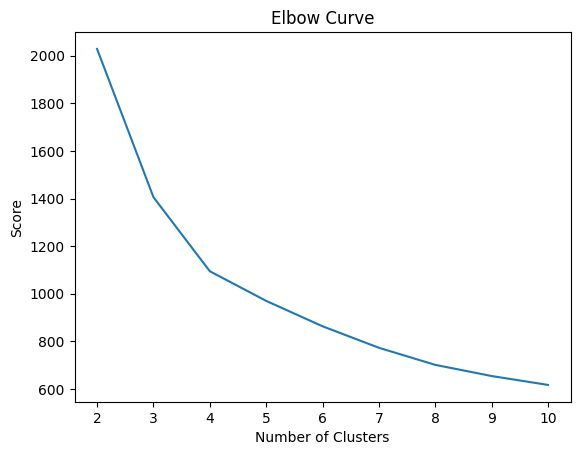

In [23]:
plt.plot(range(2, K_MAX), score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

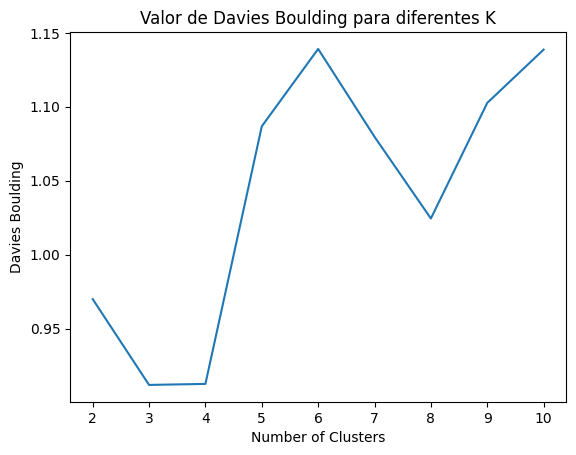

In [24]:
plt.plot(range(2, K_MAX), davies_boulding)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Boulding')
plt.title('Valor de Davies Boulding para diferentes K')
plt.show()

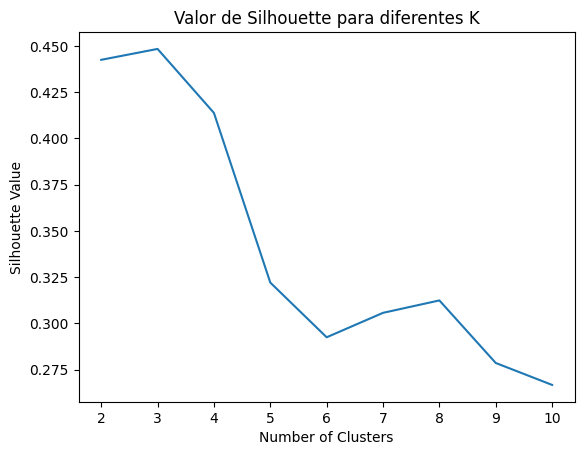

In [25]:
plt.plot(range(2, K_MAX), silhouette)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Value')
plt.title('Valor de Silhouette para diferentes K')
plt.show()

Todas las gráficas nos indican que el valor deseado es 4 clusters

## 5) Descripción de los clusters

Describe los clusters que has obtenido en el apartado anterior. Si te han salido más de 5 elige 5 de ellos que sean bastante diferentes entre sí.

Para hacerlo estudia sus descriptores estadísticos y dales un sentido dentro del contexto del problema.

Realiza una visualización teniendo en cuenta la latitud y la longitud e intenta darle una interpretación.

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. Si decidiste escalar los datos, deberás ejecutar k-Means con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un SettingWithCopyWarning por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.

In [26]:
km = KMeans(init='random', n_clusters=4, random_state=RANDOM_STATE)
km.fit(df_scaled)

df = df.assign(cluster=pd.Series(data=km.labels_, index=df.index))
df.sort_values(by="cluster").loc[:, ['cluster']]

cluster
10319        0
3552         0
3551         0
3550         0
3549         0
...        ...
2062         3
2063         3
2064         3
2041         3
20639        3

[20433 rows x 1 columns]

In [27]:
df[df["cluster"] == 0]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2969     -119.08     35.34                18.0       4070.0           512.0   
2971     -119.09     35.35                14.0       2113.0           256.0   
3370     -118.27     34.27                27.0       5205.0           859.0   
3381     -118.27     34.24                30.0       2180.0           369.0   
3385     -118.28     34.24                29.0       3390.0           580.0   
...          ...       ...                 ...          ...             ...   
20501    -118.71     34.30                20.0       1586.0           187.0   
20502    -118.68     34.33                45.0        121.0            25.0   
20503    -118.75     34.33                27.0        534.0            85.0   
20504    -118.73     34.29                11.0       5451.0           736.0   
20506    -118.73     34.29                 8.0       4983.0           754.0   

       population  households  median_income  median_house_value  \
2969       1580.0       540.0        10.5941            245800.0   
2971        842.0       265.0         8.5325            224100.0   
3370       2363.0       888.0         6.1946            276100.0   
3381       1050.0       390.0         6.3688            277600.0   
3385       1543.0       576.0         5.6184            316900.0   
...           ...         ...            ...                 ...   
20501       699.0       209.0         6.5483            335000.0   
20502        67.0        27.0         2.9821            325000.0   
20503       243.0        77.0         8.2787            330000.0   
20504      2526.0       752.0         7.3550            343900.0   
20506      2510.0       725.0         6.9454            276500.0   

      ocean_proximity  cluster  
2969           INLAND        0  
2971           INLAND        0  
3370        <1H OCEAN        0  
3381        <1H OCEAN        0  
3385        <1H OCEAN        0  
...               ...      ...  
20501       <1H OCEAN        0  
20502       <1H OCEAN        0  
20503       <1H OCEAN        0  
20504       <1H OCEAN        0  
20506       <1H OCEAN        0  

[2847 rows x 11 columns]

In [28]:
df[df["cluster"] == 1]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20533    -121.67     38.54                13.0       6141.0          1019.0   
20541    -121.70     38.54                13.0       6819.0          1158.0   
20542    -121.75     38.55                33.0       2479.0           382.0   
20573    -122.05     38.56                20.0       1005.0           168.0   
20578    -121.81     38.84                37.0        352.0            65.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20533      2553.0       967.0         4.2432            326500.0   
20541      2828.0      1115.0         4.6225            226500.0   
20542       979.0       377.0         4.7308            236200.0   
20573       457.0       157.0         5.6790            225000.0   
20578       238.0        67.0         2.8542            275000.0   

      ocean_proximity  cluster  
0            NEAR BAY        1  
1            NEAR BAY        1  
2            NEAR BAY        1  
3            NEAR BAY        1  
4            NEAR BAY        1  
...               ...      ...  
20533          INLAND        1  
20541          INLAND        1  
20542          INLAND        1  
20573          INLAND        1  
20578          INLAND        1  

[2875 rows x 11 columns]

In [29]:
df[df["cluster"] == 2]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2665     -115.52     33.12                38.0       1327.0           262.0   
2666     -115.52     33.13                18.0       1109.0           283.0   
2667     -115.51     33.12                21.0       1024.0           218.0   
2668     -115.46     33.19                33.0       1234.0           373.0   
2669     -115.51     33.24                32.0       1995.0           523.0   
...          ...       ...                 ...          ...             ...   
20497    -118.70     34.30                23.0       2831.0           406.0   
20498    -118.70     34.29                25.0       1678.0           252.0   
20499    -118.71     34.30                23.0       1983.0           280.0   
20500    -118.70     34.30                27.0       1527.0           220.0   
20505    -118.72     34.29                22.0       3266.0           529.0   

       population  households  median_income  median_house_value  \
2665        784.0       231.0         1.8793             60800.0   
2666       1006.0       253.0         2.1630             53400.0   
2667        890.0       232.0         2.1010             46700.0   
2668        777.0       298.0         1.0000             40000.0   
2669       1069.0       410.0         1.6552             43300.0   
...           ...         ...            ...                 ...   
20497      1284.0       393.0         6.1383            244100.0   
20498       862.0       268.0         6.1834            229800.0   
20499       978.0       287.0         6.3199            236700.0   
20500       756.0       226.0         6.1825            227000.0   
20505      1595.0       494.0         6.0368            248000.0   

      ocean_proximity  cluster  
2665           INLAND        2  
2666           INLAND        2  
2667           INLAND        2  
2668           INLAND        2  
2669           INLAND        2  
...               ...      ...  
20497       <1H OCEAN        2  
20498       <1H OCEAN        2  
20499       <1H OCEAN        2  
20500       <1H OCEAN        2  
20505       <1H OCEAN        2  

[8830 rows x 11 columns]

In [30]:
df[df["cluster"] == 3]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
8        -122.26     37.84                42.0       2555.0           665.0   
12       -122.26     37.85                52.0       2491.0           474.0   
13       -122.26     37.84                52.0        696.0           191.0   
14       -122.26     37.85                52.0       2643.0           626.0   
15       -122.26     37.85                50.0       1120.0           283.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
8          1206.0       595.0         2.0804            226700.0   
12         1098.0       468.0         3.0750            213500.0   
13          345.0       174.0         2.6736            191300.0   
14         1212.0       620.0         1.9167            159200.0   
15          697.0       264.0         2.1250            140000.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  cluster  
8            NEAR BAY        3  
12           NEAR BAY        3  
13           NEAR BAY        3  
14           NEAR BAY        3  
15           NEAR BAY        3  
...               ...      ...  
20635          INLAND        3  
20636          INLAND        3  
20637          INLAND        3  
20638          INLAND        3  
20639          INLAND        3  

[5881 rows x 11 columns]

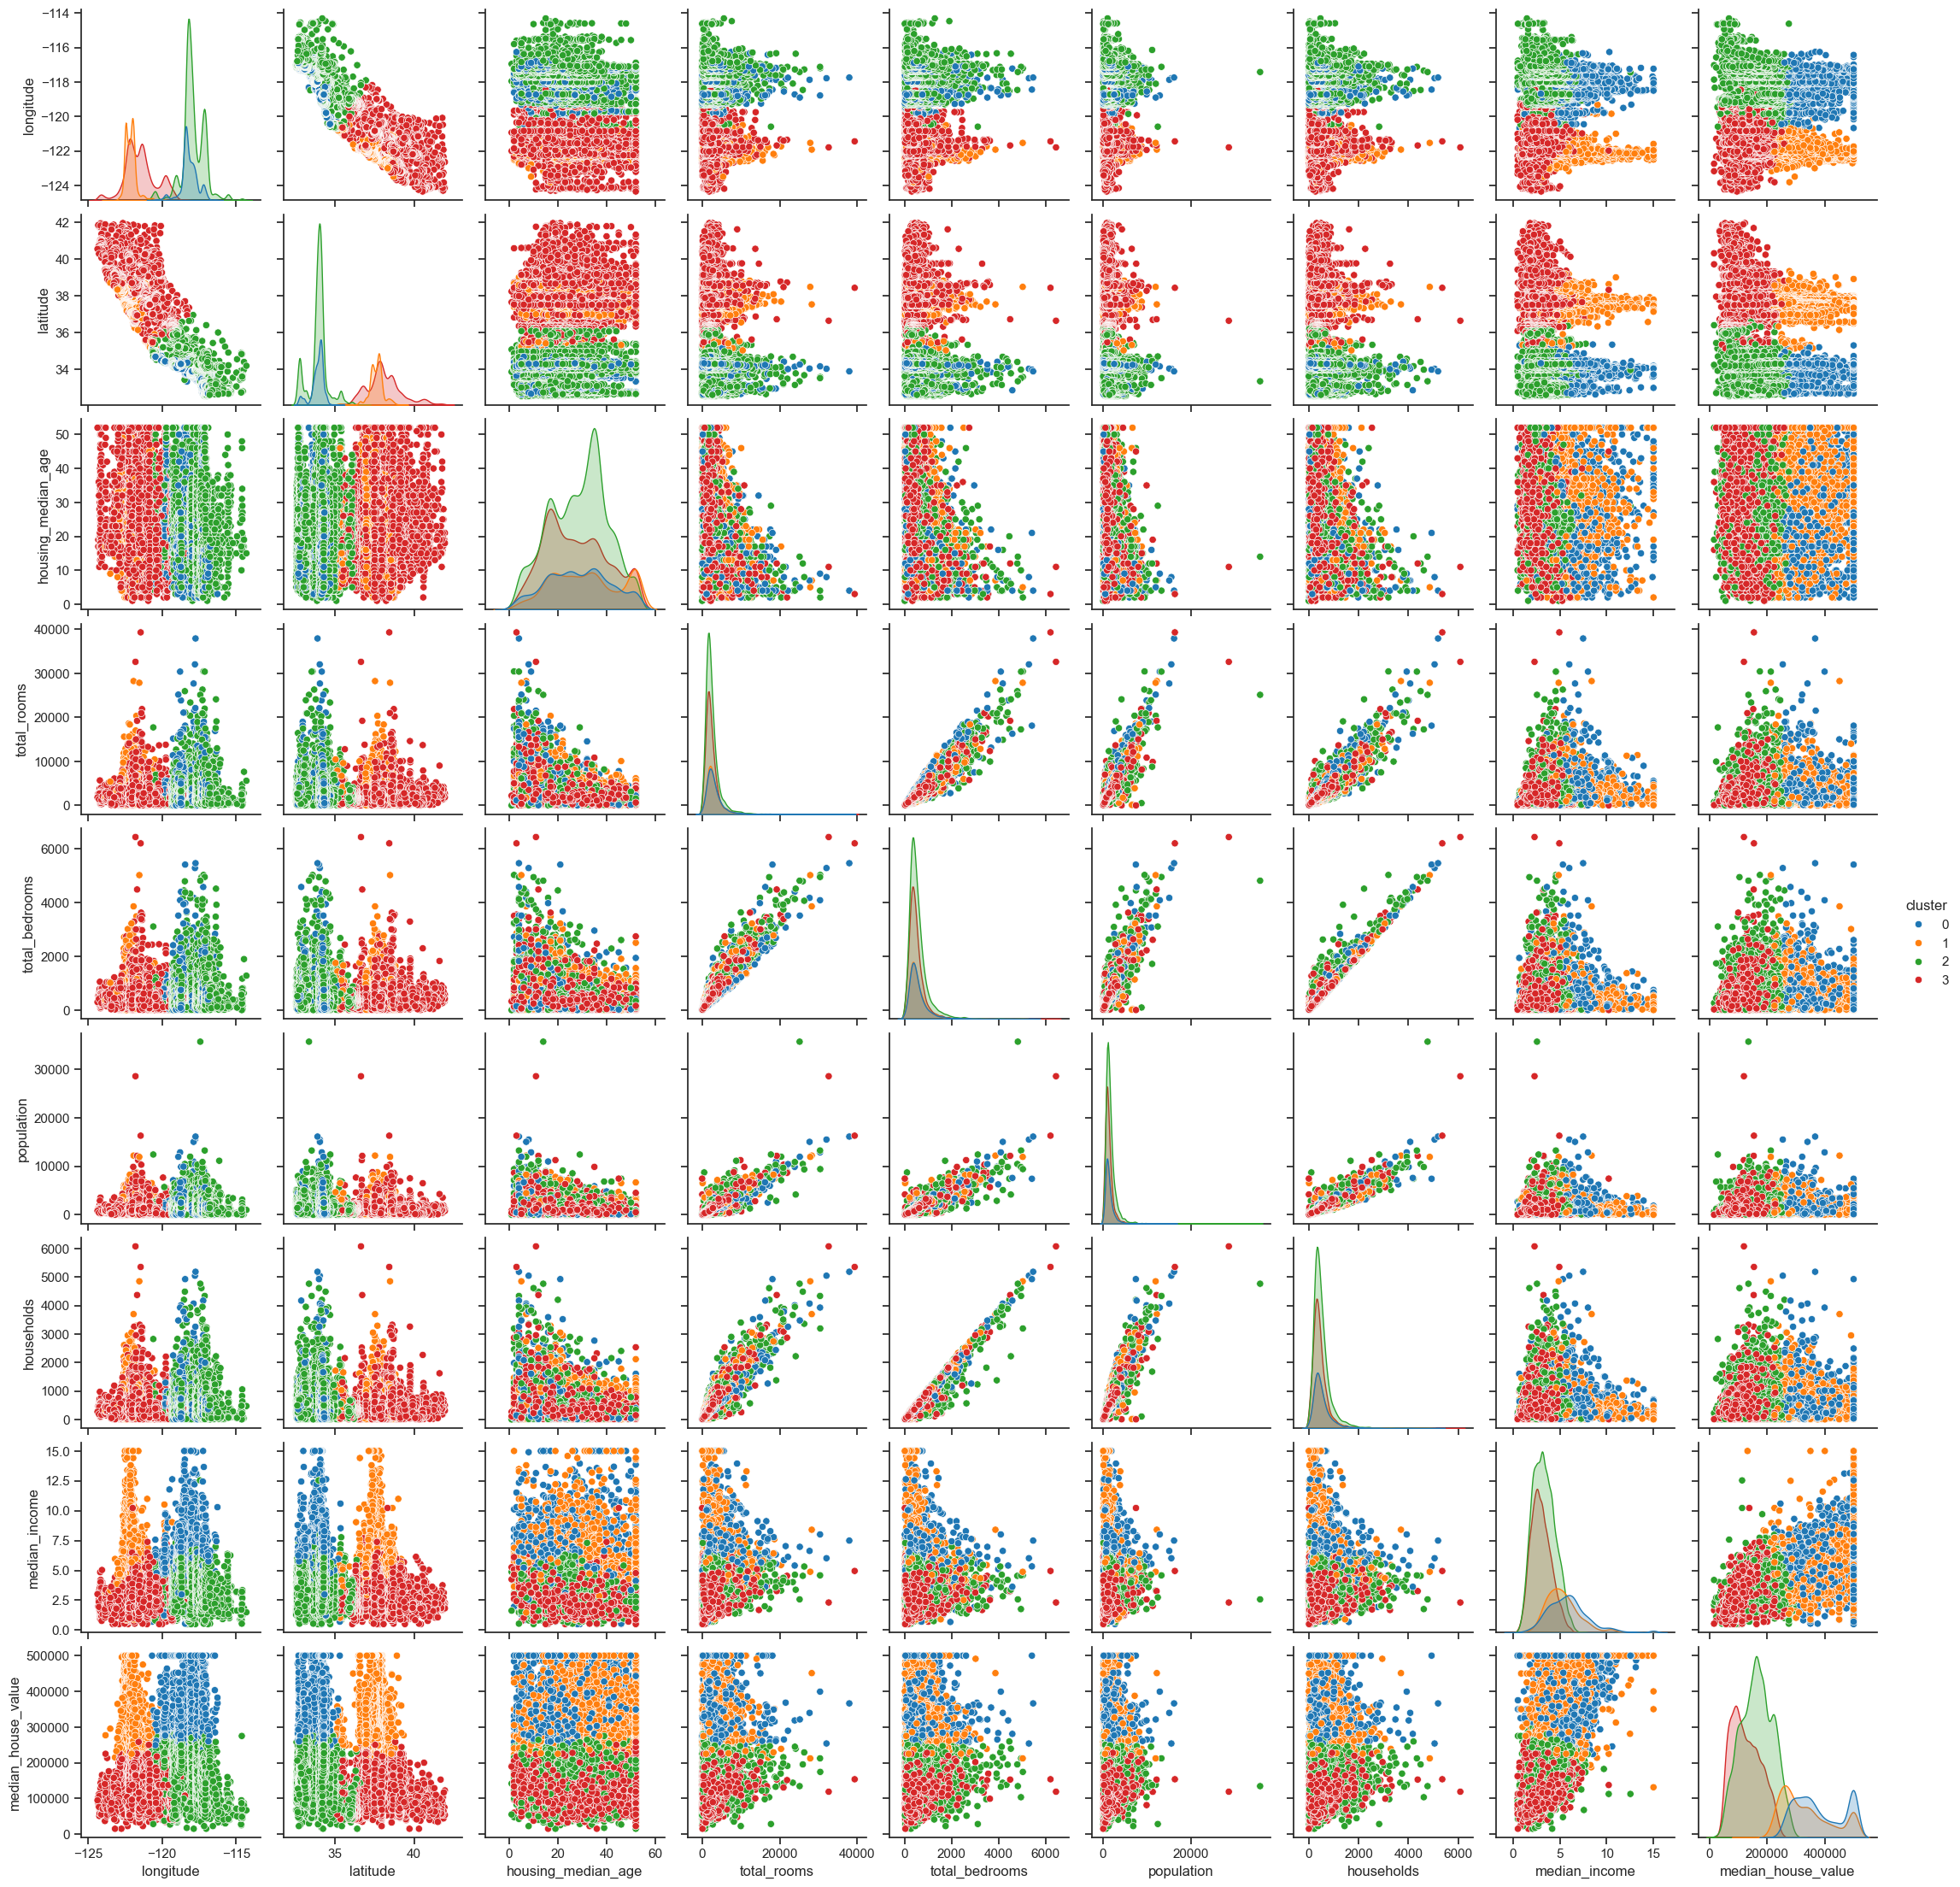

In [31]:
import seaborn as sns

sns.set_theme(style="ticks")
sns.pairplot(df, hue = "cluster", palette="tab10")

## 6) Clustering jerárquico aglomerativo
Repite los apartados 4 y 5 usando clustering jerárquico aglomerativo.

